## Joins

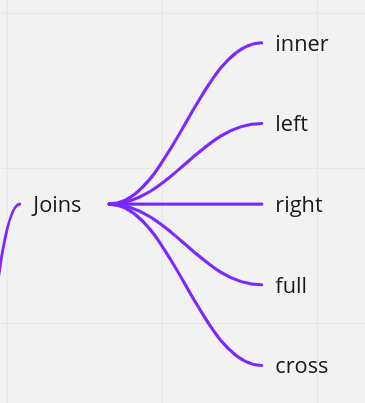


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql import Window

# Create SparkSession
spark = (SparkSession.builder
                    .appName('PySparkSyntax')
                    .getOrCreate()
        )

In [ ]:
# Cria um DataFrame com informações de vendas
vendas_data = [("2022-01-01", 1, 100.0),
               ("2022-01-02", 2, 50.0),
               ("2022-01-03", 3, 25.0)]

vendas = spark.createDataFrame(vendas_data, ["data", "produto_id", "valor"])

vendas.toPandas()

In [ ]:
# Cria um DataFrame com informações de produtos
produtos_data = [(1, "Arroz"),
                 (2, "Feijão"),
                 (4, "Óleo")]

produtos = spark.createDataFrame(produtos_data, ["produto_id", "produto_nome"])

produtos.toPandas()

## [join](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.join.html#pyspark.sql.DataFrame.join)

DataFrame.join(

other: pyspark.sql.dataframe.DataFrame, 

on: Union[str, List[str], pyspark.sql.column.Column, List[pyspark.sql.column.Column], None] = None, 

how: Optional[str] = None) → pyspark.sql.dataframe.DataFrame

## Left Join

In [ ]:
# Executa um left join entre as tabelas vendas e produtos
# left, leftouter, left_outer
left_join = vendas.join(produtos, "produto_id", "left")

left_join.show()

## Right Join

In [ ]:
# Executa um right join entre as tabelas vendas e produtos
# right, rightouter, right_outer
right_join = vendas.join(produtos, "produto_id", "right")

right_join.show()

## Full Join

In [ ]:
# Executa um full join entre as tabelas vendas e produtos
# full, outer, fullouter, full_outer
full_join = vendas.join(produtos, "produto_id", "full")

full_join.show()

## Inner Join (default)

In [ ]:
# Executa um inner join entre as tabelas vendas e produtos
inner_join = vendas.join(produtos, "produto_id")

inner_join.show()

In [ ]:
# Executa um inner join entre as tabelas vendas e produtos
inner_join = vendas.join(produtos, "produto_id", "inner")

inner_join.show()

In [ ]:
inner_join = vendas.join(produtos, vendas.produto_id == produtos.produto_id, 'inner')
inner_join.show()

## [alias](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.alias.html)

DataFrame.alias(alias: str) → pyspark.sql.dataframe.DataFrame

Returns a new DataFrame with an alias set.

In [ ]:
inner_join = vendas.alias('v').join(produtos.alias('p'), F.col("v.produto_id") == F.col("p.produto_id"), 'inner')
inner_join.show()

## [CrossJoin](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.crossJoin.html#pyspark.sql.DataFrame.crossJoin)

DataFrame.crossJoin(other: pyspark.sql.dataframe.DataFrame) → pyspark.sql.dataframe.DataFrame

Returns the cartesian product with another DataFrame.

In [ ]:
# Cria um DataFrame com os possíveis naipes
naipes_data = [("Ouros",), ("Espadas",), ("Copas",), ("Paus",)]
naipes = spark.createDataFrame(naipes_data, ["naipes"])

naipes.toPandas()

In [ ]:
# Cria um DataFrame com os possíveis números de cartas
numeros_data = [("2",), ("3",), ("4",), ("5",), ("6",), ("7",), ("8",), ("9",), ("10",), ("J",), ("Q",), ("K",), ("A",)]
numeros = spark.createDataFrame(numeros_data, ["numero"])

numeros.toPandas()

In [ ]:
# Executa o cross join entre os DataFrames "naipes" e "numeros_com_valor"
baralho = numeros.crossJoin(naipes)

baralho.orderBy('numero', 'naipes').show()

In [ ]:
print(numeros.count())
print(naipes.count())
print(baralho.count())